# Visualizing Regularization of ResNet18 Trained on CIFAR100

In this notebook I visualize torchvisions' ResNet18 models trained on the CIFAR100 dataset using various regularization techniques. The CIFAR100 data is preprocessed by normalizing using mean [0.5071, 0.4865, 0.4409] and variance [0.2009, 0.1984, 0.2023]. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Models are trained with no regularization, L2 regularization, SVB regularization and Jacobian regularization with a dropout rate of p_drop = 0.5. I also train a model with Jacobian Regularization without dropout. The L2 regularization coefficient and Jacobian regularization coefficient are the same as in Hoffman 2019: l2_lmbd = 0.0005 and lambda_jacobian_reg = 0.01. For SVB regularization I use the hyperparameters svb_freq=600 and svb_eps = 0.05. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 50 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_CIFAR100
from model_classes import ResNet18
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
    plot_fgsm,
    plot_multiple_fgsm,
    plot_pgd,
    plot_multiple_pgd,
)
from tools import ModelInfo

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST data
train_loader, test_loader = data_loader_CIFAR100()

# Summary of model
summary_model = ResNet18().to(device)
summary(summary_model, (3, 32, 32))

Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
            Conv2d-2           [-1, 64, 28, 28]          36,928
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
            Conv2d-5          [-1, 128, 10, 10]         147,584
         MaxPool2d-6            [-1, 128, 5, 5]               0
            Linear-7                  [-1, 256]         819,456
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 256]          65,792
          Dropout-10                  [-1, 256]               0
           Linear-11                   [-1, 10]           2,570
Total params: 1,147,978
Trainable params: 1,147,978
Non-trainable params: 0
---------------

In [3]:
# Load models
dataset = "cifar100"
model_names = [
    "model_no_reg_0",
    "model_l2_0",
    "model_jacobi_0",
    "model_jacobi_no_dropout_0",
    "model_svb_0",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Plots of Accuracy Curves

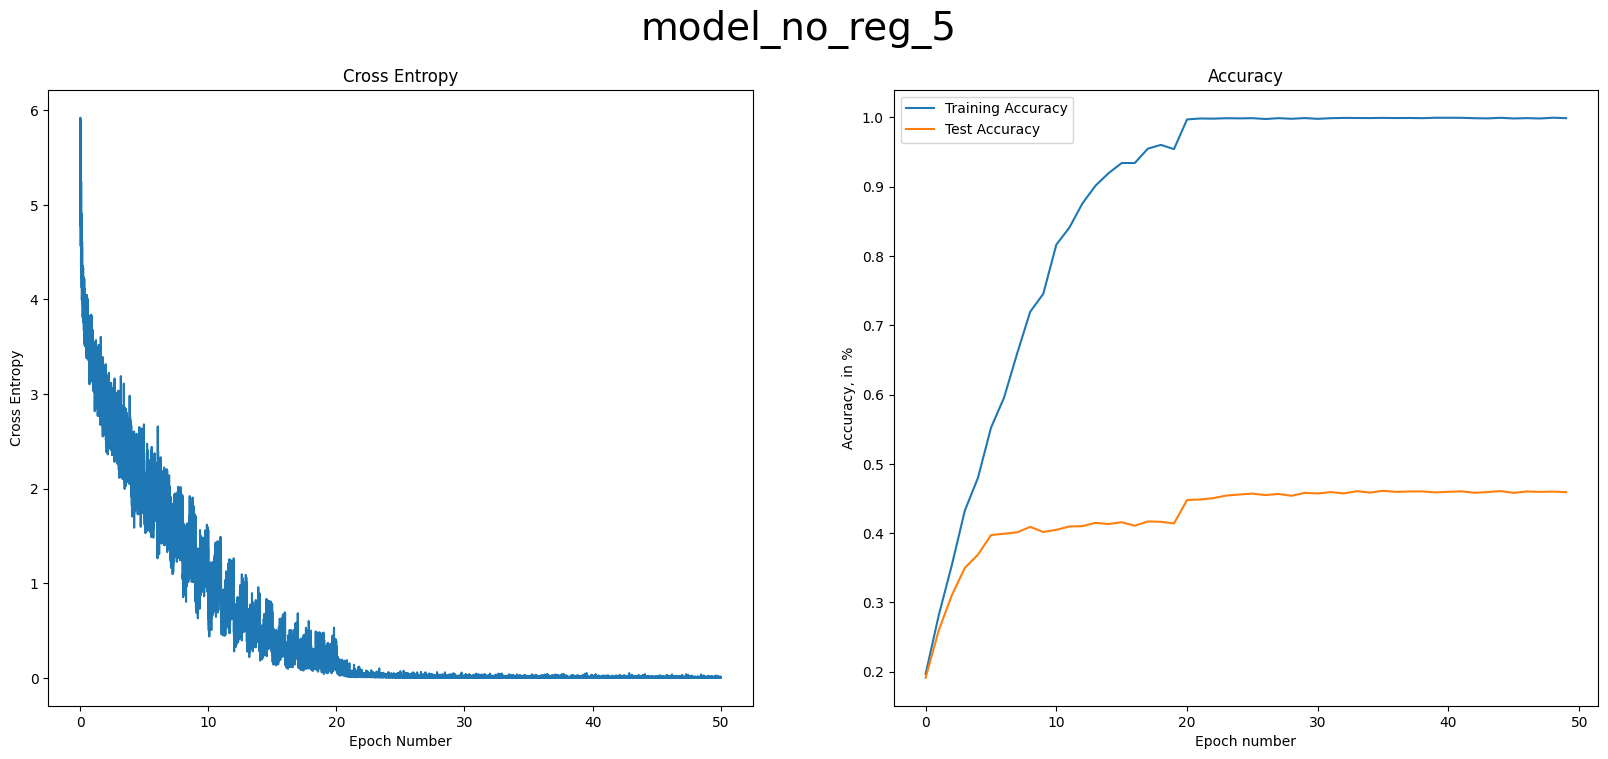

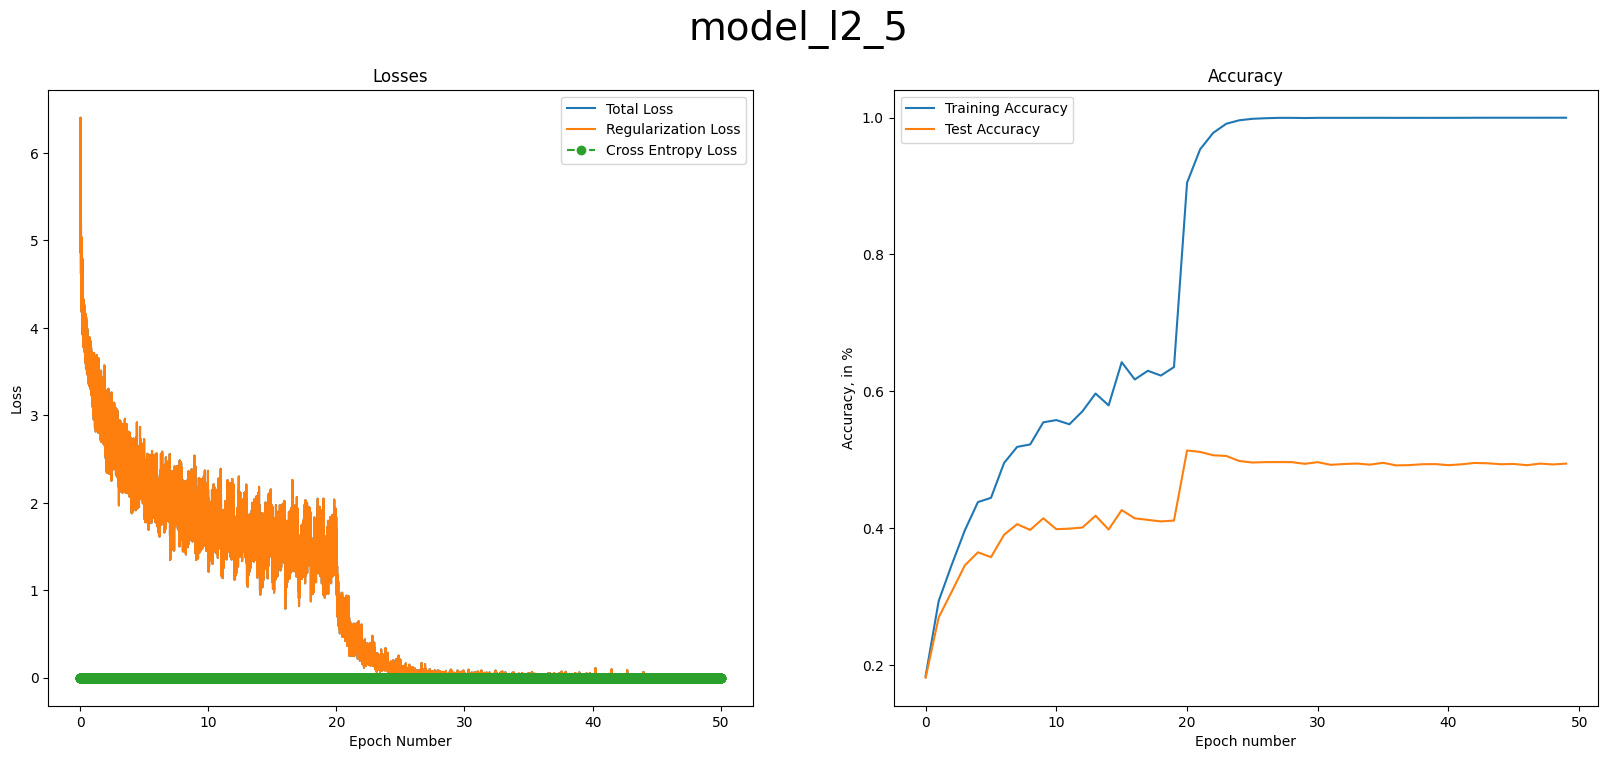

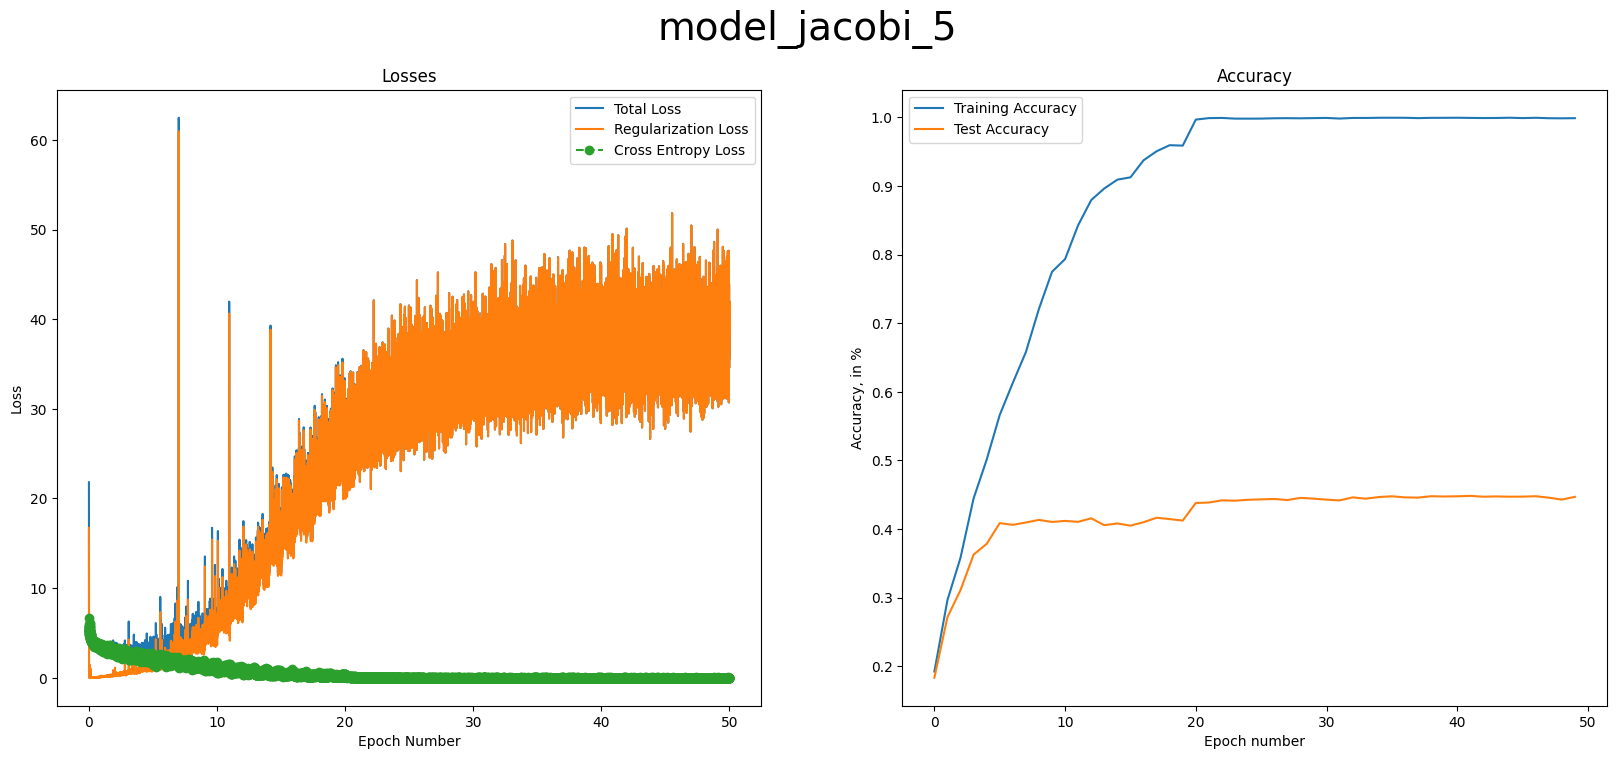

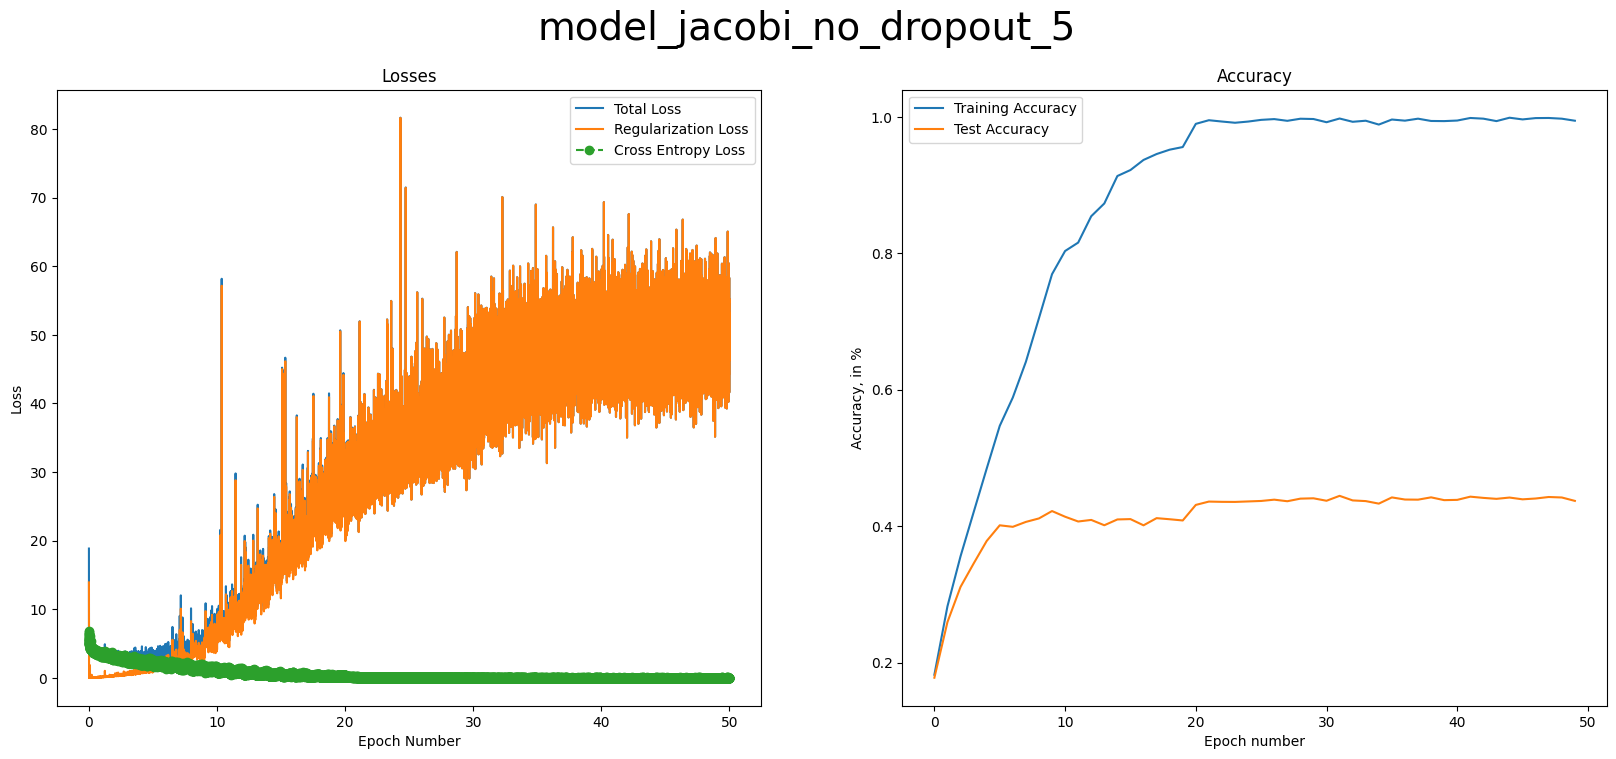

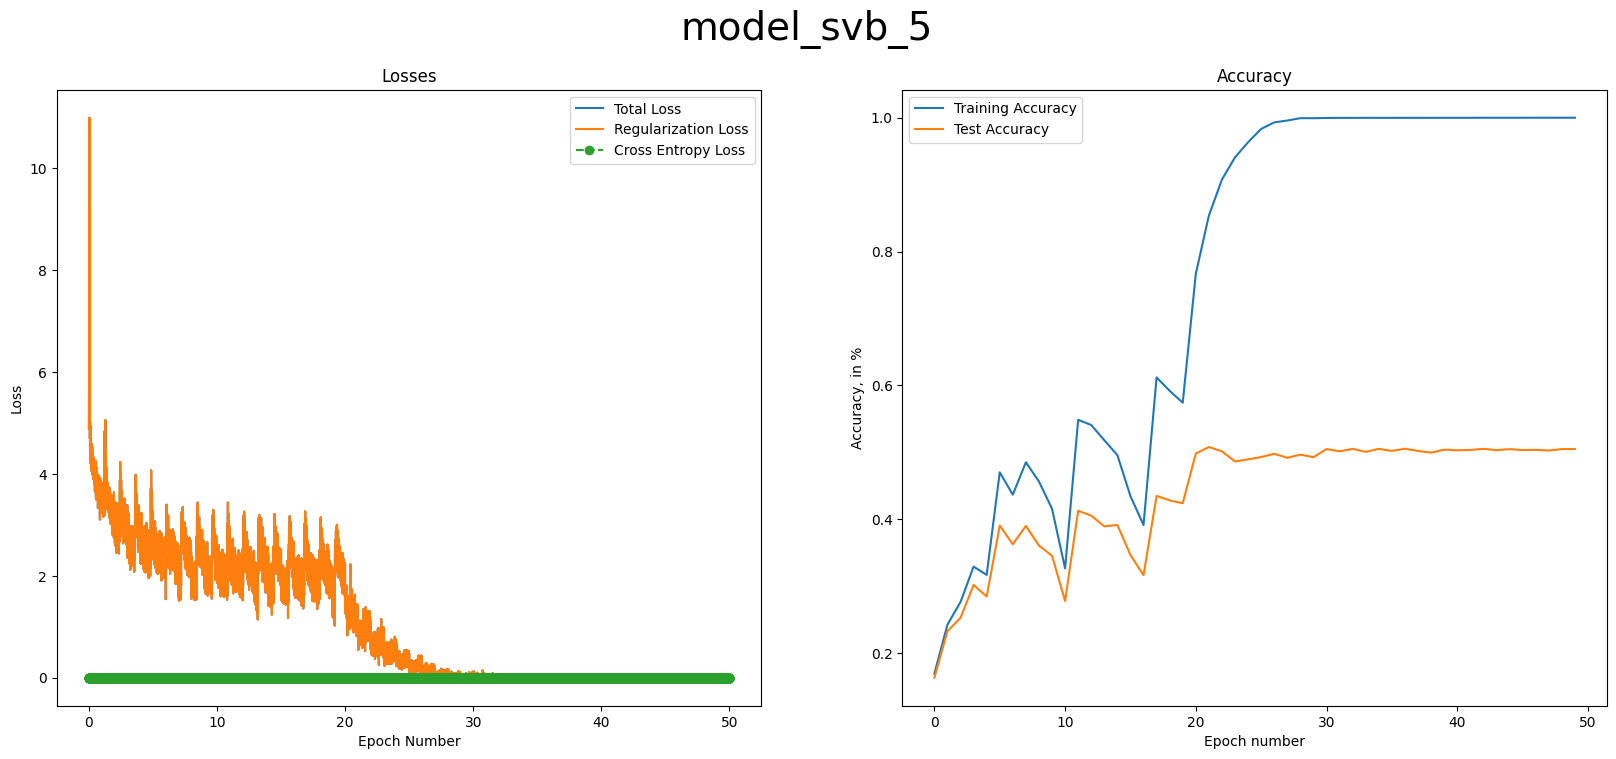

In [4]:
for model_name in model_names:
    if model_name.startswith("model_no_reg"):
        plot_results(models, model_name, title=f"{model_name}")
    else:
        plot_reg_results(models, model_name, title=f"{model_name}")

### Plots of Decision Boundaries

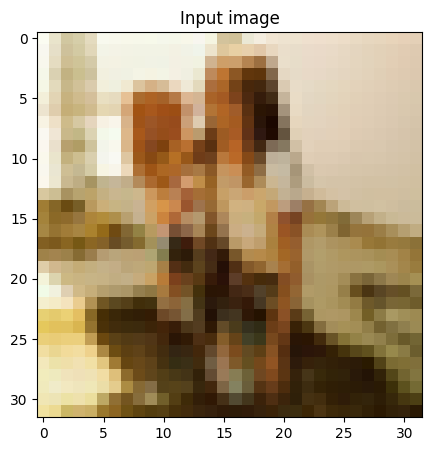

c:\ProgramData\Anaconda3\envs\bioai\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


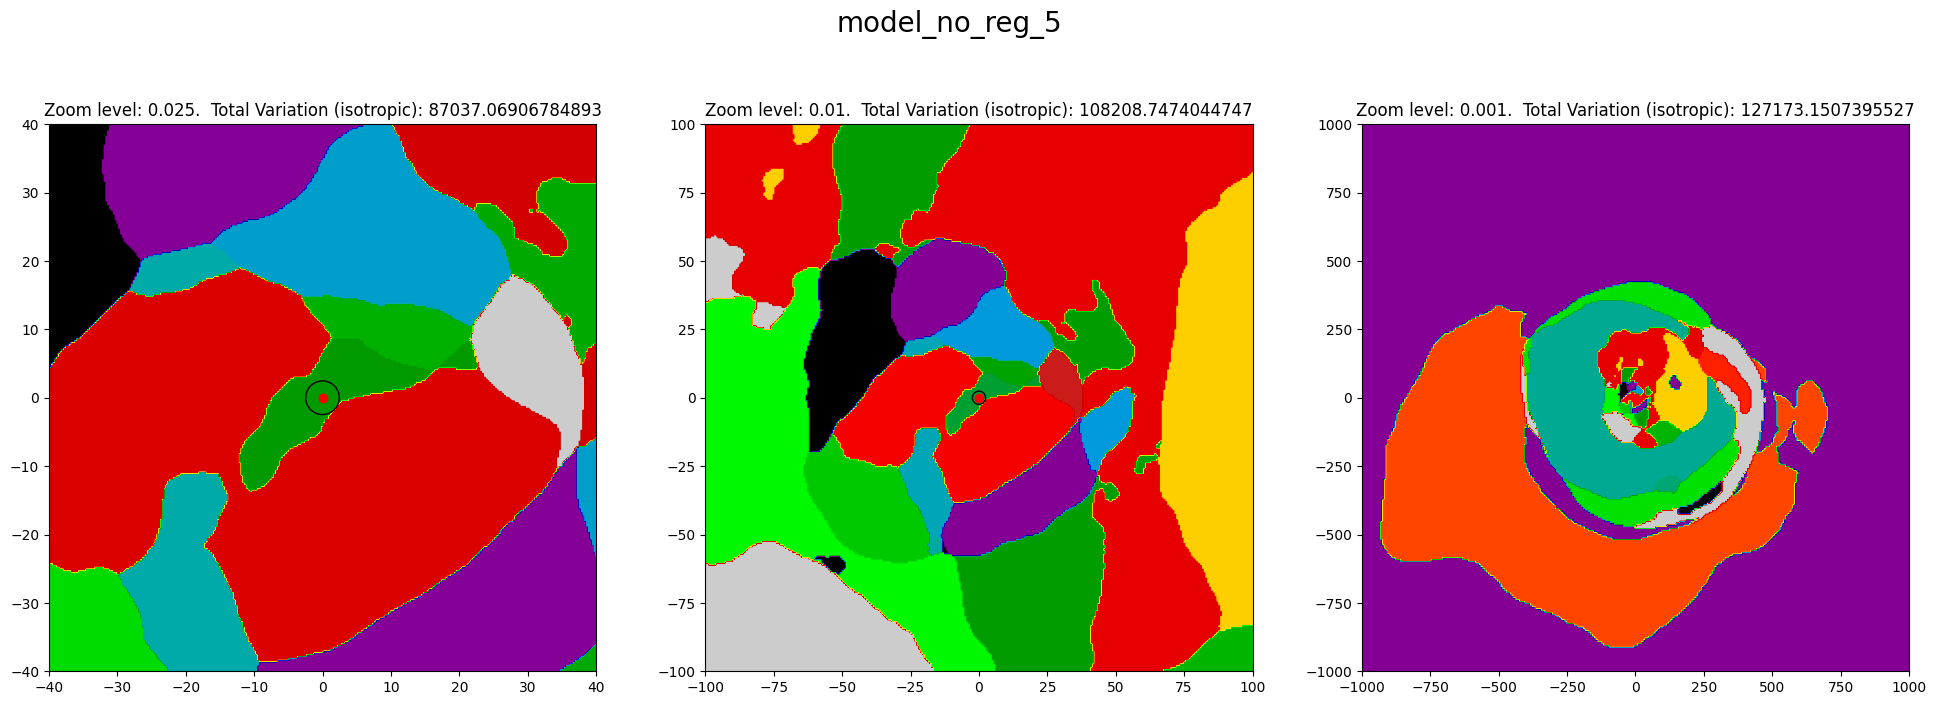

KeyboardInterrupt: 

In [5]:
for model_name in model_names:
    image = get_random_img(test_loader)
    v1, v2 = generate_random_vectors(image)
    plot_and_print_img(
        image, models[f"{model_name}"].model, device, f"{model_name}", dataset
    )
    plot_decision_boundary(
        models[f"{model_name}"].model,
        image,
        v1,
        v2,
        device,
        resolution=300,
        dataset=dataset,
        title=f"{model_name}",
    )

### Plots of Results of FGSM Attacks

In [ ]:
for model_name in model_names:
    print(f"FGSM Attack Against Model: {model_name}")
    plot_fgsm(models[f"{model_name}"].model, model_name, device, test_loader, dataset)

FGSM Attack Against Model: model_no_reg_0


  0%|          | 0/100 [00:10<?, ?it/s]


KeyboardInterrupt: 

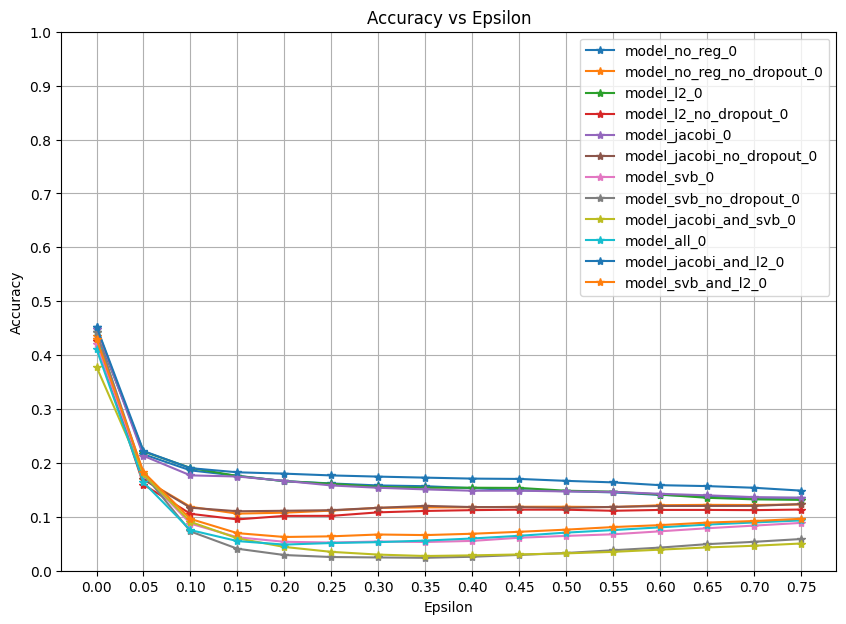

In [ ]:
plot_multiple_fgsm(models, model_names, device, test_loader, dataset)

### Plots of Results of PGD Attacks

PGD Attack Against Model: model_no_reg_0


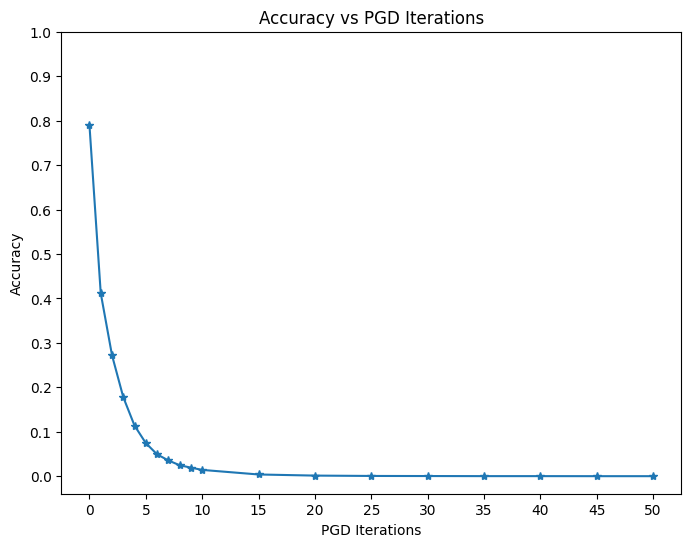

PGD Attack Against Model: model_no_reg_no_dropout_0


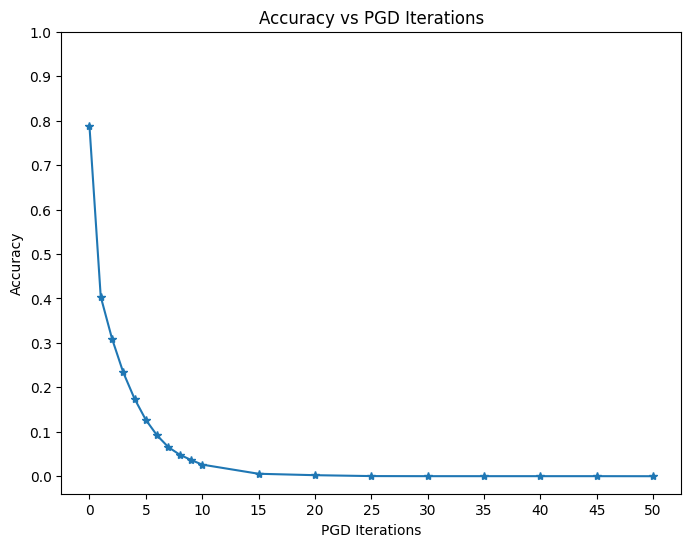

PGD Attack Against Model: model_l2_0


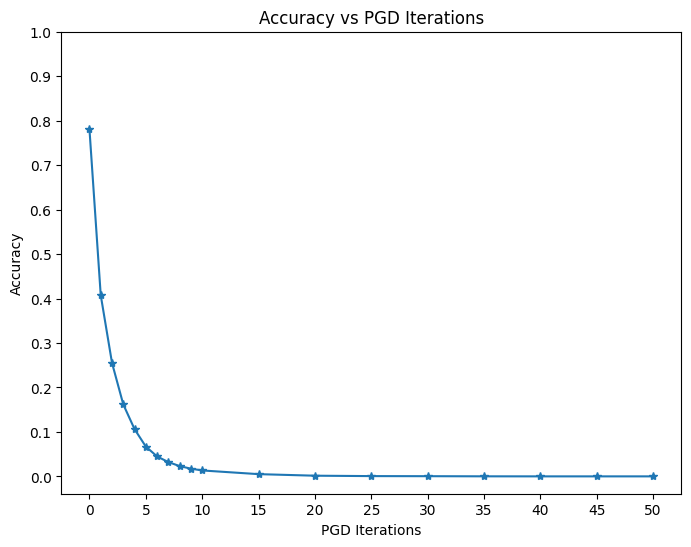

PGD Attack Against Model: model_l2_no_dropout_0


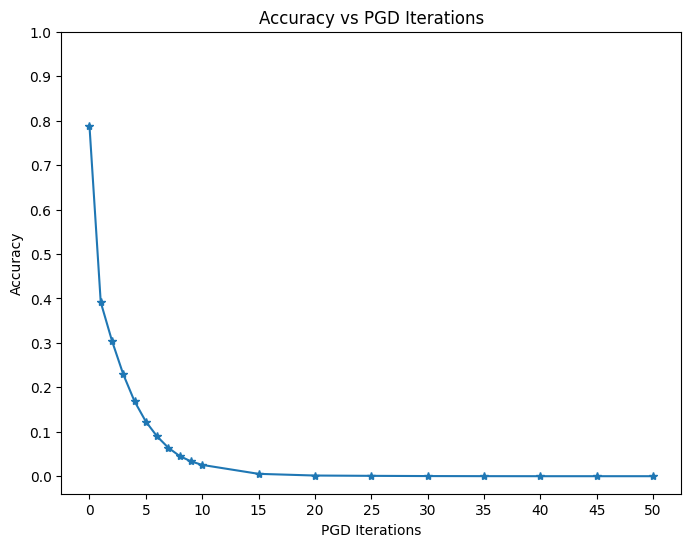

PGD Attack Against Model: model_jacobi_0


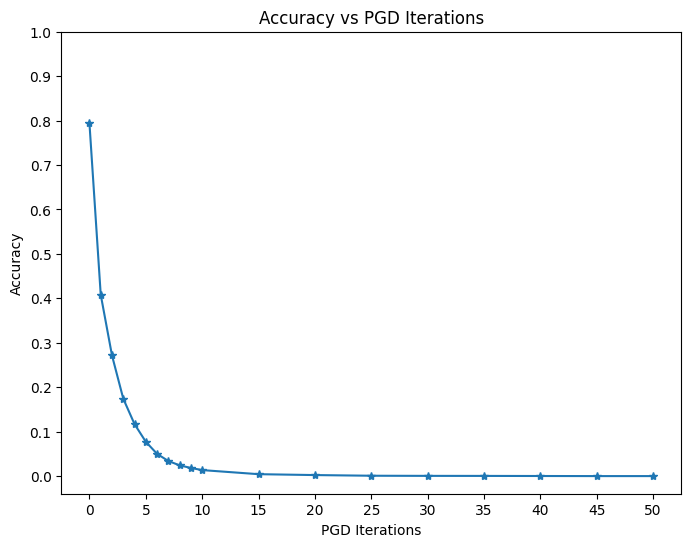

PGD Attack Against Model: model_jacobi_no_dropout_0


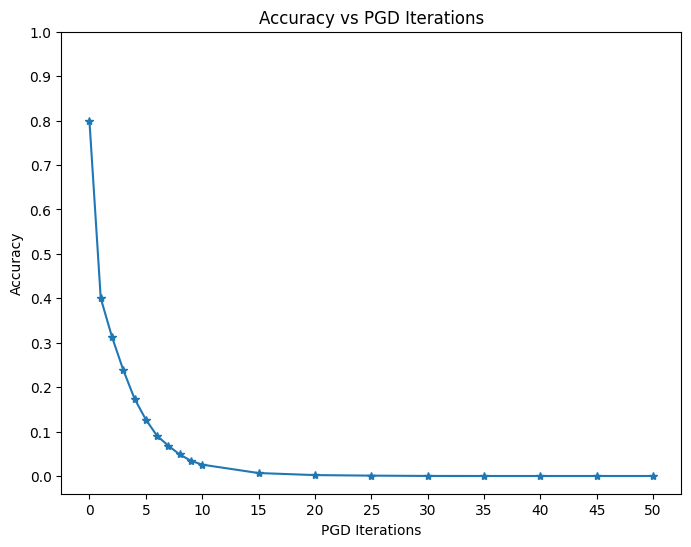

PGD Attack Against Model: model_svb_0


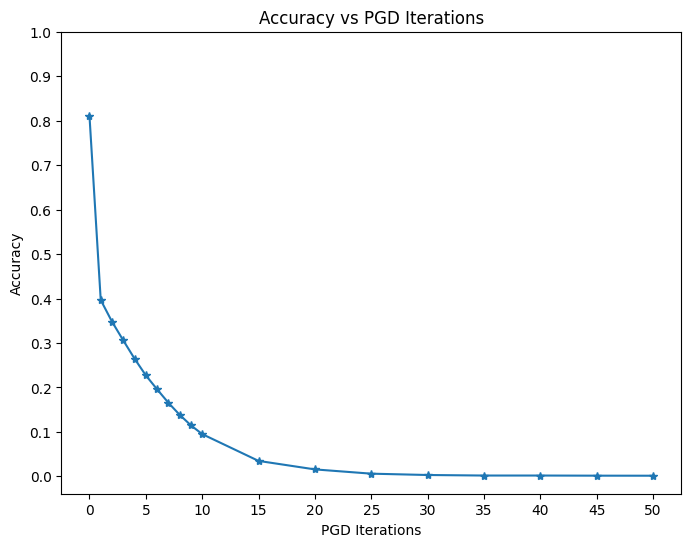

PGD Attack Against Model: model_svb_no_dropout_0


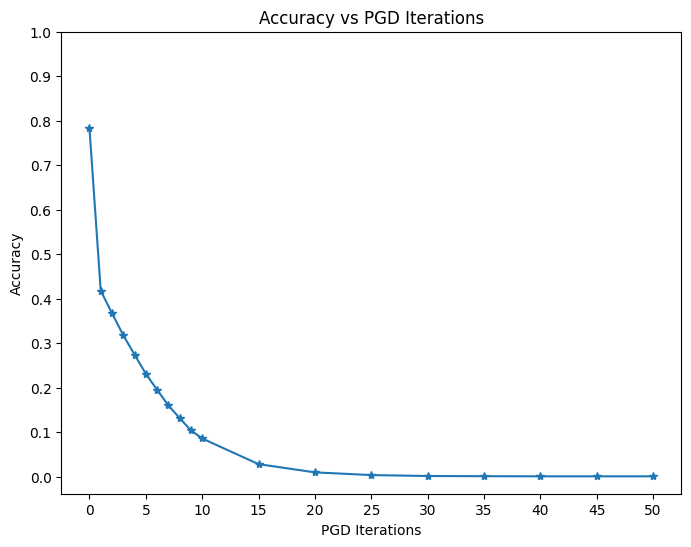

PGD Attack Against Model: model_jacobi_and_svb_0


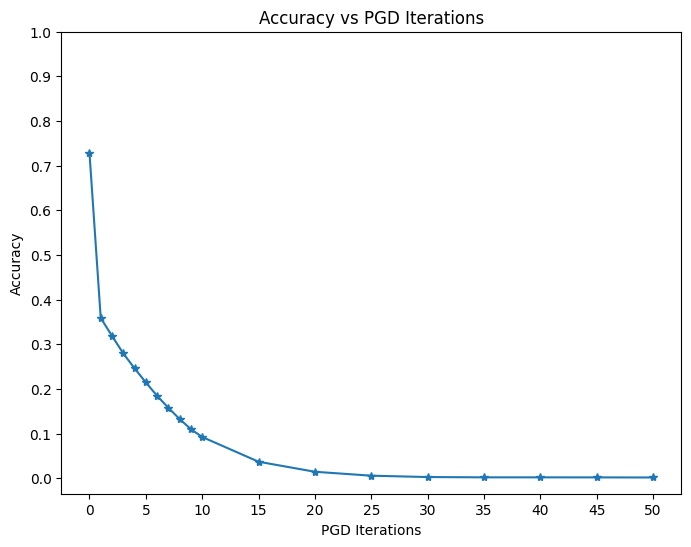

PGD Attack Against Model: model_all_0


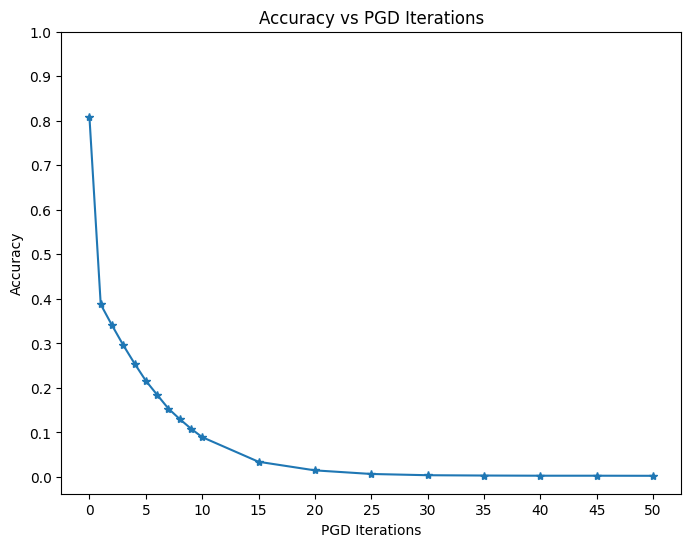

PGD Attack Against Model: model_jacobi_and_l2_0


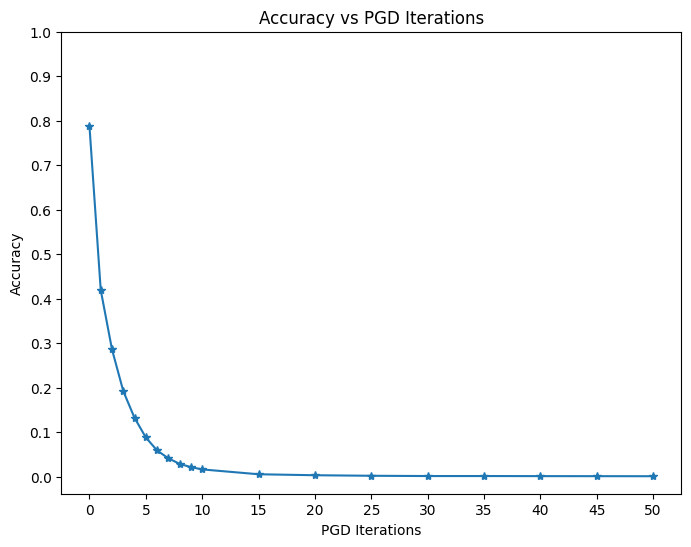

PGD Attack Against Model: model_svb_and_l2_0


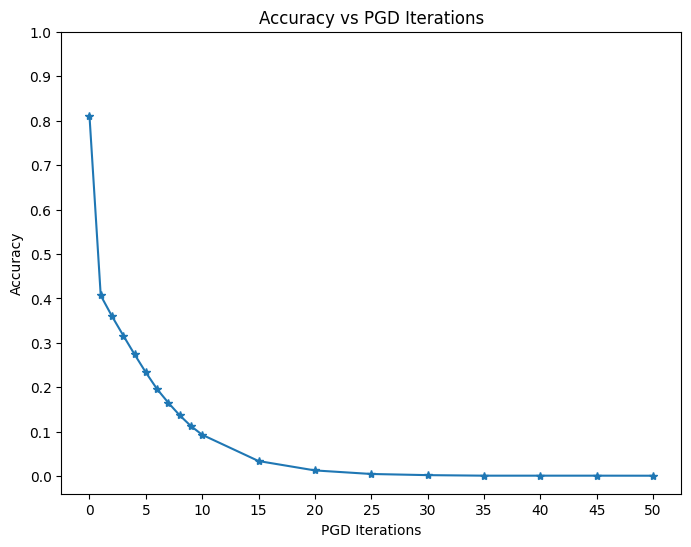

In [ ]:
for model_name in model_names:
    print(f"PGD Attack Against Model: {model_name}")
    plot_pgd(
        models[f"{model_name}"].model,
        model_name,
        device,
        test_loader,
        dataset,
    )

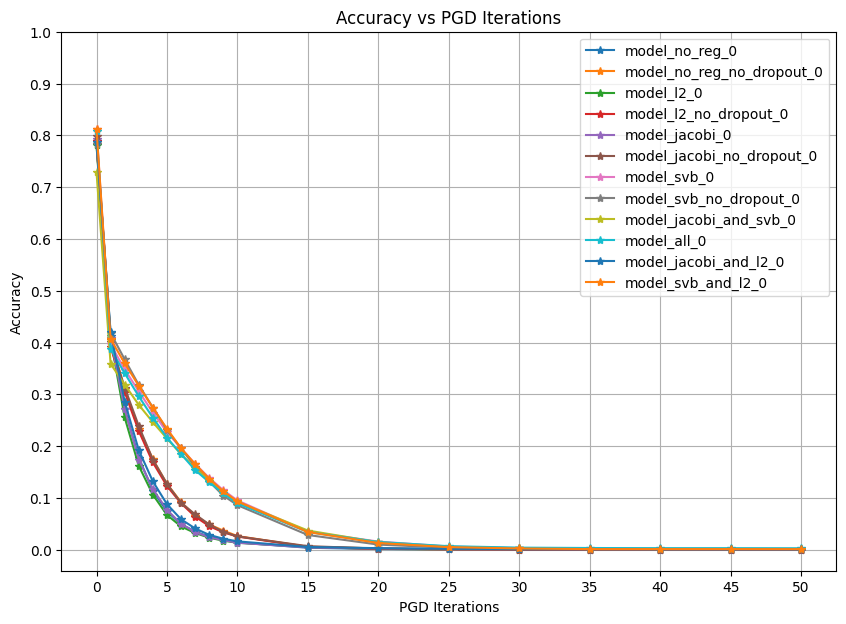

In [ ]:
plot_multiple_pgd(models, model_names, device, test_loader, dataset)